# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [224]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [225]:
#ваш код
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [226]:
#ваш код
# проверяем данные на наличие пропусков
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [227]:
# Альтернативный поиск пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Пропусков нет

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [228]:
#ваш код
# Предикторы
X = data[['TV', 'radio', 'newspaper']].values
# Таргет (целевая переменная)
y = data[['sales']].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [229]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [230]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [231]:
# Инициализируем переменную с кол-вом итераций
num_iters = 1000
# Размерность матрицы: m - строки, n - столбцы
m, n = X.shape 
# Нулевой вектор весов
w = np.zeros((n, 1)) 
# с помощью вложенных циклов 1000 раз проходимся в каждом столбце. 
# В каждой итерации внутреннего цикла переменная h вычисляется с использованием матричного умножения и оператора среза. 
# После этого обновляется элемент массива w
for i in range(num_iters):
    for k in range(n):
        h = (X[:, 0:k] @ w[0:k]) + (X[:, k+1:] @ w[k+1:])
        w[k] = (X[:, k].T @ (y - h))
        

print(f'Вектор весов:\n {w}')

Вектор весов:
 [[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [232]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [233]:
#ваш код
#Ненормализованные данные
# Предикторы
X = data[['TV', 'radio', 'newspaper']].values
# Таргет (целевая переменная)
y = data[['sales']].values

# масштабирование
X = (X - X.mean()) / X.std()

**Добавим единичный столбец**

In [234]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [235]:
#ваш код
def mse_error(y, y_pred):
      return ((y - y_pred) ** 2).mean()

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [236]:
#ваш код
y_pred = np.full_like(y, np.mean(y))
mse = mse_error(y, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse}')

Среднеквадратичная ошибка (MSE): 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [237]:
#ваш код
def lin_pred(X, w):
    y_pred = X@w
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [238]:
#ваш код
def stoch_grad_step(X, y, w, train_id, eta=0.01):
    x_train = X[train_id]
    y_train = y[train_id]
    
    y_pred = lin_pred(x_train.reshape(1, -1), w)
    
    stoch_grad = x_train * (y_pred - y_train) / len(X)
    weight_new = w - 2* eta * stoch_grad
    
    return weight_new

In [239]:
# Check funcktion
stoch_grad_step(X, y, w, 11, 0.1)

array([[ 41.36671017,  41.18591812,  41.67155821,  41.72249058],
       [109.93597968, 109.75518762, 110.24082772, 110.29176008],
       [ 73.3331445 ,  73.15235245,  73.63799254,  73.68892491],
       [ -0.74552572,  -0.92631777,  -0.44067768,  -0.38974531]])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [240]:
# ваш код
def stochastic_gradient_descent(X, y, w, learning_rate, max_iter, eucl_dist):
    """Функция для реализации стохастического градиентного спуска
    
    Принимает на вход следующие аргументы:
        X (array): матрица предикторов
        y (array): целевая переменная
        w (array): веса модели
        learning_rate (float): темп обучения
        max_iter (type): максимальное количество итерации
        eucl_dist (type): евклидово расстояние между векторами весов
    """
    
    distance = np.inf
    errors = []
    count_iters = 0
    

    
    while distance > eucl_dist and count_iters < max_iter:
        random_i = np.random.randint(X.shape[0])
        errors.append(mse_error(y, lin_pred(X, w)))
        w_new = stoch_grad_step(X, y, w, random_i, learning_rate)
        distnce = np.linalg.norm(w - w_new)
       
        w = w_new
        count_iters += 1
    return w, errors
        
            

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

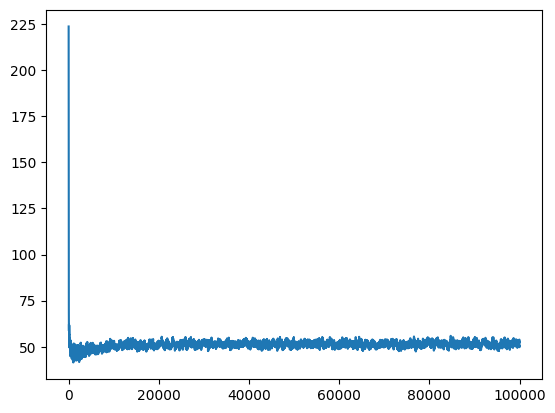

In [241]:
# ваш код
m, n = X.shape  
w = np.zeros(n)  
learning_rate = 1 
max_iter = 10**5
eucl_dist = 10**(-5)
final_weights, errors = stochastic_gradient_descent(X, y, w, learning_rate, max_iter, eucl_dist)
plt.plot(errors)

**Выведите вектор весов, к которому сошелся метод.**

In [242]:
# ваш код
print(f'Вектор весов:\n{final_weights}')

Вектор весов:
[ 1.87269879e+01  3.43282410e+00  1.43503218e+01 -7.88931150e-03]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [243]:
# ваш код
print(f'MSE на последней итерации: {errors[-1]}')

MSE на последней итерации: 50.471416217024796
